<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.001457  42.068164  86.744186  0.730108  227.543916   
      1.0    32.468207  68.509050  88.230753  1.632376  200.840387   
      2.0    92.914756  38.108065  38.471231 -0.048523  179.445530   
      3.0    71.190212  40.379026  64.371622 -0.015694  185.925167   
      4.0    55.436400  34.440822  94.547367 -0.124391  194.300198   
...                ...        ...        ...       ...         ...   
999.0 245.0  97.049733  57.722371  33.992889  0.530284  199.295276   
      246.0  82.849004  31.140243  35.791249 -1.011109  158.769387   
      247.0  40.297513  42.231566  99.136035  1.447301  193.112415   
      248.0  54.861676  45.725690  48.847697 -0.531857  158.903206   
      249.0  49.401116  90.356966  86.295970 -0.649994  235.404058   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.775690  0.768226  
      1.0    199.261760  1.578627  
      2.0    179.340335  0.105195  
      3.0    185.874362  0.050805  
      4.0    194.442093 -0.141895  
...                 ...       ...  
999.0 245.0  198.652656  0.642620  
      246.0  159.709181 -0.939794  
      247.0  191.700484  1.411931  
      248.0  159.428339 -0.525133  
      249.0  236.053510 -0.649452  

[250000 rows x 7 columns]

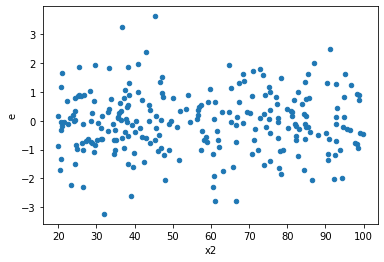

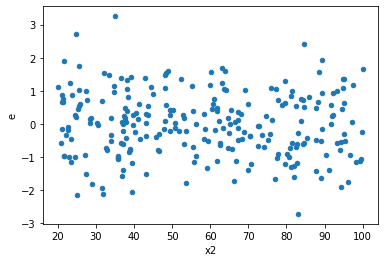

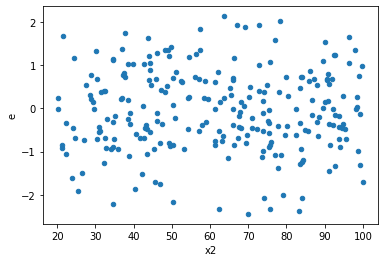

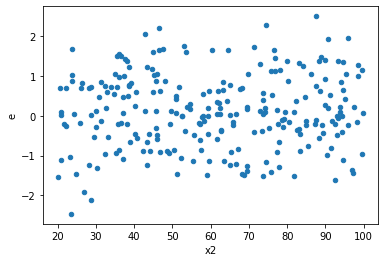

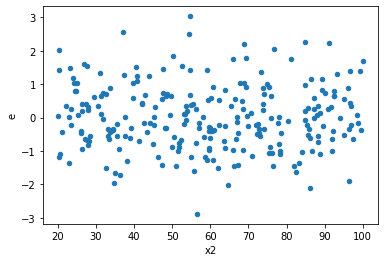

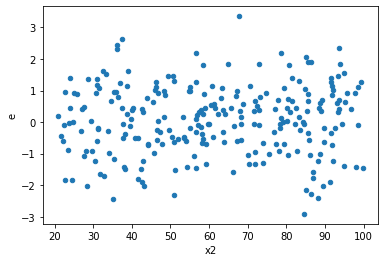

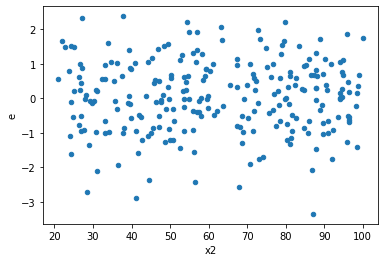

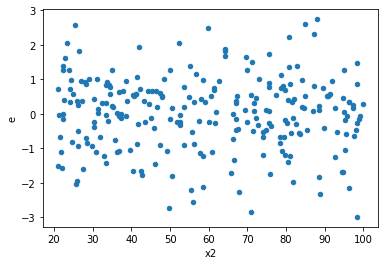

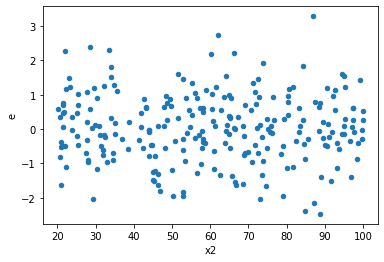

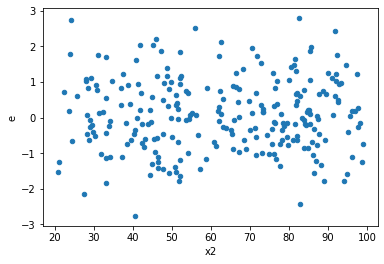

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,97.0,97.0,92.78594880085022,95.03828830675393,0.9565561732046415,0.9797761681108652,1.0242745753534082,0.9062220181064933,0.5468889909467534,0.45311100905324664,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,92.11368544658028,114.00108123601976,0.9496256231606214,1.1752688787218533,1.2376128550641121,0.2955042719280705,0.8522478640359648,0.14775213596403525,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,87.84633306523484,98.85653377426776,0.9056322996415963,1.0191395234460594,1.1253347786396128,0.5620395320415517,0.7189802339792242,0.28101976602077583,Reject001=1 : Homoscedasticity
12.0,97.0,97.0,77.127293915307,93.13477599213283,0.7951267413949176,0.9601523298158023,1.2075462688267469,0.354640127089326,0.822679936455337,0.177320063544663,Reject001=1 : Homoscedasticity
14.0,97.0,97.0,81.7972114693936,100.09442381306931,0.8432702213339547,1.031901276423395,1.2236899279937197,0.3218310917111673,0.8390844541444163,0.16091554585558365,Reject001=1 : Homoscedasticity
16.0,97.0,97.0,91.9988290448994,94.18742553599319,0.9484415365453546,0.9710043869690019,1.0237893950805141,0.9080661693907088,0.5459669153046456,0.4540330846953544,Reject001=1 : Homoscedasticity
17.0,97.0,97.0,75.60298763165288,81.35786302548662,0.7794122436252874,0.8387408559328517,1.0761196822256842,0.7186271099633568,0.6406864450183216,0.3593135549816784,Reject001=1 : Homoscedasticity
22.0,97.0,97.0,84.35105214441276,97.16800237805298,0.8695984757155955,1.0017319832788967,1.1519477221421854,0.48736899259979216,0.7563155037001039,0.24368449629989608,Reject001=1 : Homoscedasticity
24.0,97.0,97.0,81.18576615028351,92.03713793271571,0.836966661343129,0.9488364735331516,1.1336610134631868,0.5379017036334914,0.7310491481832543,0.2689508518167457,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,121.13357832554978,105.09599740593792,1.2487997765520595,1.083463890782865,0.8676041677187937,0.48563150275277284,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,97.63946274570561,84.65927797326363,1.0065923994402641,0.8727760615800374,0.8670600553564303,0.48370801014793774,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,86.12742487511903,82.2786507705619,0.8879115966507117,0.8482335130985762,0.9553130247405203,0.8223394428577586,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,85.11444243817049,77.00711517832552,0.8774684787440257,0.7938877853435621,0.904747924939597,0.6230312204323185,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,92.78594880085022,95.03828830675393,0.9565561732046415,0.9797761681108652,1.0242745753534082,0.9062220181064933,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,119.0927849751978,113.78652128131144,1.2277606698474,1.1730569204258912,0.9554442891314412,0.8228644637738571,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,114.8978714079306,113.49882119017204,1.1845141382260886,1.1700909401048665,0.9878235323194857,0.9520164727366162,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,92.11368544658028,114.00108123601976,0.9496256231606214,1.1752688787218533,1.2376128550641121,0.2955042719280705,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,87.84633306523484,98.85653377426776,0.9056322996415963,1.0191395234460594,1.1253347786396128,0.5620395320415517,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64